In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
import os
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [2]:
train_path="data/classification/train"
test_path="data/classification/test"
val_path="data/classification/valid"
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
# Data Augmentation and Preparation that has been recommended
IDG = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = IDG.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')
test_generator = IDG.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')
val_generator = IDG.flow_from_directory(val_path,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

Using TensorFlow backend.


Found 160 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [3]:
model = Sequential()
model.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))
model.add(Dense(2, activation = 'softmax'))
model.layers[0].trainable = False

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
from tensorflow.python.keras import optimizers

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [5]:
from tensorflow.python.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('model/ResNet50_model.hdf5', monitor='val_loss',verbose=1, save_best_only=True)

In [6]:
H = model.fit_generator(
        train_generator,
        steps_per_epoch=25,
        epochs = 25,
        validation_data=val_generator,
        validation_steps=25,
        callbacks=[mc]
)

Epoch 1/25
25/25 [==============================] - 57s 2s/step - loss: 0.6653 - acc: 0.7000

Epoch 00001: val_loss improved from inf to 0.66528, saving model to model/ResNet50_model.hdf5
25/25 [==============================] - 234s 9s/step - loss: 0.2772 - acc: 0.8763 - val_loss: 0.6653 - val_acc: 0.7000
Epoch 2/25
25/25 [==============================] - 53s 2s/step - loss: 0.8733 - acc: 0.6000

Epoch 00002: val_loss did not improve from 0.66528
25/25 [==============================] - 208s 8s/step - loss: 0.0798 - acc: 0.9725 - val_loss: 0.8733 - val_acc: 0.6000
Epoch 3/25
25/25 [==============================] - 56s 2s/step - loss: 0.9209 - acc: 0.6000

Epoch 00003: val_loss did not improve from 0.66528
25/25 [==============================] - 204s 8s/step - loss: 0.0421 - acc: 0.9925 - val_loss: 0.9209 - val_acc: 0.6000
Epoch 4/25
25/25 [==============================] - 53s 2s/step - loss: 0.9685 - acc: 0.6000

Epoch 00004: val_loss did not improve from 0.66528
25/25 [==========

Epoch 24/25
25/25 [==============================] - 54s 2s/step - loss: 1.4267 - acc: 0.6000

Epoch 00024: val_loss did not improve from 0.66528
25/25 [==============================] - 221s 9s/step - loss: 0.0051 - acc: 1.0000 - val_loss: 1.4267 - val_acc: 0.6000
Epoch 25/25
25/25 [==============================] - 92s 4s/step - loss: 1.3849 - acc: 0.5500

Epoch 00025: val_loss did not improve from 0.66528
25/25 [==============================] - 300s 12s/step - loss: 0.0056 - acc: 1.0000 - val_loss: 1.3849 - val_acc: 0.5500


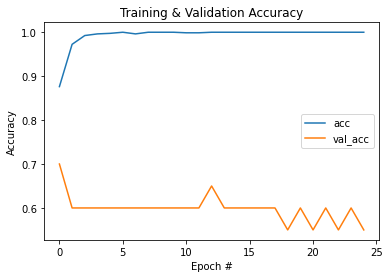

In [7]:
import matplotlib.pyplot as plt
# plot training history
plt.figure()
plt.plot(H.history['acc'], label='acc')
plt.plot(H.history['val_acc'], label='val_acc')

plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("plot/ResNet50_model_A.png")
plt.show()

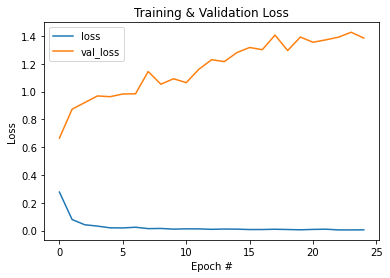

In [8]:
import matplotlib.pyplot as plt
# plot training history
plt.figure()
plt.plot(H.history['loss'], label='loss')
plt.plot(H.history['val_loss'], label='val_loss')

plt.title("Training & Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("plot/ResNet50_model_L.png")
plt.show()

In [10]:
from tensorflow.keras.models import load_model
model2 = load_model("model/ResNet50_model.hdf5")
model2.evaluate_generator(test_generator)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


[0.9068409204483032, 0.75]